<a href="https://colab.research.google.com/github/Segrey372017/gb_ML_in_business/blob/main/ssmirnov_ml_business_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.model_selection import train_test_split

Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

Данные лежат на google диске по [ссылке](https://drive.google.com/file/d/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ/view?usp=sharing).

In [3]:
#!wget 'https://drive.google.com/uc?export=download&id=1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ' -O WA_Fn-UseC_-Telco-Customer-Churn.csv

In [4]:
DATA_LINK = 'https://raw.githubusercontent.com/Segrey372017/gb_ML_in_business/main/HW1_dataset-Telco-Customer-Churn.csv' # берем из репозитория на git

In [5]:
df = pd.read_csv(DATA_LINK)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

Male      0.504756
Female    0.495244
Name: gender, dtype: float64


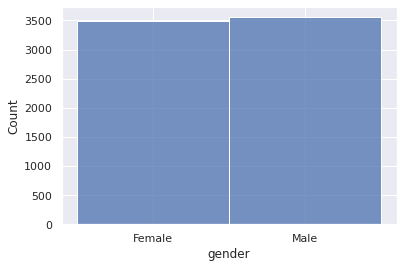

In [6]:
#Ваш код здесь
print(df.gender.value_counts(normalize = True)) # Получаем сразу долевое соотношение
sns.histplot(df.gender)

Соотношение клиентов по полу практически 50%/50% по данному критерию набор данных сбалансирован


##### 2. Какое количество уникальных значений у поля InternetService?

In [7]:
len(df.InternetService.unique().tolist()) # хотя можно и через value_counts

3

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [8]:
#Ваш код здесь
"""
print("Описательная статистика по TotalCharges \n")
print(f"Медианное значение: {df.TotalCharges.median()}")
print(f" Среднее значение: {df.TotalCharges.mean()}")
print(f" Стандартное отклонение: {df.TotalCharges.median()}")
"""
#sns.boxplot(df.TotalCharges)

'\nprint("Описательная статистика по TotalCharges \n")\nprint(f"Медианное значение: {df.TotalCharges.median()}")\nprint(f" Среднее значение: {df.TotalCharges.mean()}")\nprint(f" Стандартное отклонение: {df.TotalCharges.median()}")\n'

In [9]:
print(df.TotalCharges.dtype)
print(df.TotalCharges.value_counts())

object
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64


В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

Данные в столбце TotalCharges имеют строковый формат, т.е. воспринимаются как текстовые значения. В результате расчет статистики невозможен

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [10]:
#Ваш код здесь
ps_rep = {'Yes':1, 'No':0} # словарь для замены значений 
df.PhoneService = df.PhoneService.replace(ps_rep) # заменяем значения
df.PhoneService.value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [11]:
#Ваш код здесь
tc_rep = {' ': np.nan} # словарь замены
df.TotalCharges = df.TotalCharges.replace(tc_rep) # заменяем пробелы на 
df.TotalCharges = df.TotalCharges.astype('float32') # приведение типа
df.TotalCharges = df.TotalCharges.fillna(0)

Описательная статистика по TotalCharges 

Медианное значение: 1394.550048828125
 Среднее значение: 2279.732177734375
 Стандартное отклонение: 1394.550048828125


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


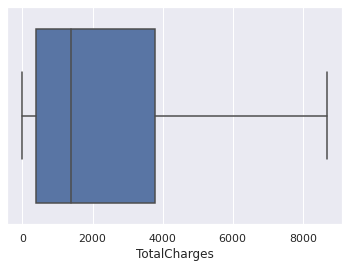

In [12]:
print("Описательная статистика по TotalCharges \n")
print(f"Медианное значение: {df.TotalCharges.median()}")
print(f" Среднее значение: {df.TotalCharges.mean()}")
print(f" Стандартное отклонение: {df.TotalCharges.median()}")
sns.boxplot(df.TotalCharges)

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [13]:
#Ваш код здесь
df.Churn = df.Churn.replace(ps_rep)
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [14]:
#Ваш код здесь
rcols = ['StreamingMovies', 'StreamingTV', 'TechSupport'] # список колонок
rep = {'Yes':1, 'No':0, 'No internet service': 0} # шаблон замен
df[rcols] = df[rcols].replace(rep) # делаем замены
for c in rcols:
    print(df[c].value_counts()) # проверяем

0    4311
1    2732
Name: StreamingMovies, dtype: int64
0    4336
1    2707
Name: StreamingTV, dtype: int64
0    4999
1    2044
Name: TechSupport, dtype: int64


##### 8. Заполните пропуски в поле PhoneService значением 0

In [15]:
#Ваш код здесь
df.PhoneService = df.PhoneService.fillna(0)

In [16]:
df.PhoneService.value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

##### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [17]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
#Ваш код здесь
df = pd.DataFrame(df[columns]) # перезапишем датафрейм
df.head(3)



,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку.

In [18]:
features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify= y, random_state = 42)


In [19]:
print(X_train.shape) # проверяем корректность разделения датасета
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 7)
(1409, 7)
(5634,)
(1409,)


In [20]:
y_train.value_counts(normalize= True) # проверяем соотношение классов в контрольной и тренировочной выборках

0    0.734647
1    0.265353
Name: Churn, dtype: float64

In [21]:
y_test.value_counts(normalize = True)

0    0.734564
1    0.265436
Name: Churn, dtype: float64

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([('ColumnSelector', ColumnSelector(key = 'gender')), 
                   ('OHEEncoder', OHEEncoder(key = 'gender'))]) #Ваш код здесь

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [23]:
#Ваш код здесь
gender.fit_transform(X_train)

,gender_Female,gender_Male
3738,0,1
3151,0,1
4860,0,1
3867,1,0
3810,0,1
...,...,...
6303,1,0
6227,0,1
4673,1,0
2710,1,0


In [24]:
X_train.head(3) # применение конвейера не вызвало изменения в датасете

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport
3738,Male,35,0,1701.650024,1,1,0
3151,Male,15,1,1151.550049,0,0,0
4860,Male,13,0,590.349976,0,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [25]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

Это может быть полезно если данные имеют слишком большой раброс по масштабу (например площадь квартиры в кв.м., а стоиомсть в рублях). Ряд моделей - особенно линейные - чуствительны к маштабу и ненормированные данные могут вызвать неправильную работу модели.

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [26]:
#Ваш код здесь
TotalCharges = Pipeline([('selector', NumberSelector(key = 'TotalCharges')),
                         ('standard', StandardScaler())
                         ])

Объединение всех "кубиков" очень легко сделать таким образом

In [27]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [28]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

In [29]:
feature_processing.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                           

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [31]:
#Ваш код здесь
y_pred = pipeline.predict(X_test) # прогноз

In [32]:
y_proba = pipeline.predict_proba(X_test) # получаем вероятности для классов

In [33]:
pd.DataFrame(data = y_proba, columns = ['Class0', 'Class1']).head(10) # действительно вероятности для двух классов

,Class0,Class1
0,1.00,0.00
1,0.39,0.61
2,0.62,0.38
3,0.91,0.09
4,0.98,0.02
5,0.28,0.72
6,0.64,0.36
7,1.00,0.00
8,0.88,0.12
9,0.96,0.04


##### 15. Посчитайте метрики качества получившейся модели (roc_auc)

In [34]:
from sklearn.metrics import roc_auc_score, confusion_matrix

#Ваш код здесь
print(roc_auc_score(y_test, y_pred))


0.6664703298974399


Text(30.5, 0.5, 'True values')

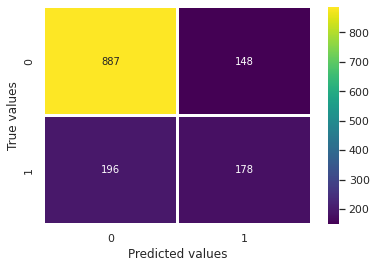

In [35]:
# матрица соответсвия
sns.heatmap(confusion_matrix(y_test, y_pred),cmap = 'viridis', annot = True, linewidths= 2, fmt = '1d')
plt.xlabel('Predicted values')
plt.ylabel('True values')

Видно смещение модели в сторону наиболее частотного класса, а также значительное число ложно-положительных классификаций.

### Сохраним наш пайплайн

In [36]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)